In [1]:
source('~/pycharmprojects/nyu-research/ts.R')


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.2 



In [4]:
june <- preprocessing('twitter_tsa/data/june/june_alc.csv', 'twitter_tsa/data/june/june_total.csv')
june_alc <- ts(june$series[33:(672+32)], frequency=24)
june_tot <- ts(june$total[33:(672+32)], frequency=24)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [9]:
june_notalc <- june_tot - june_alc

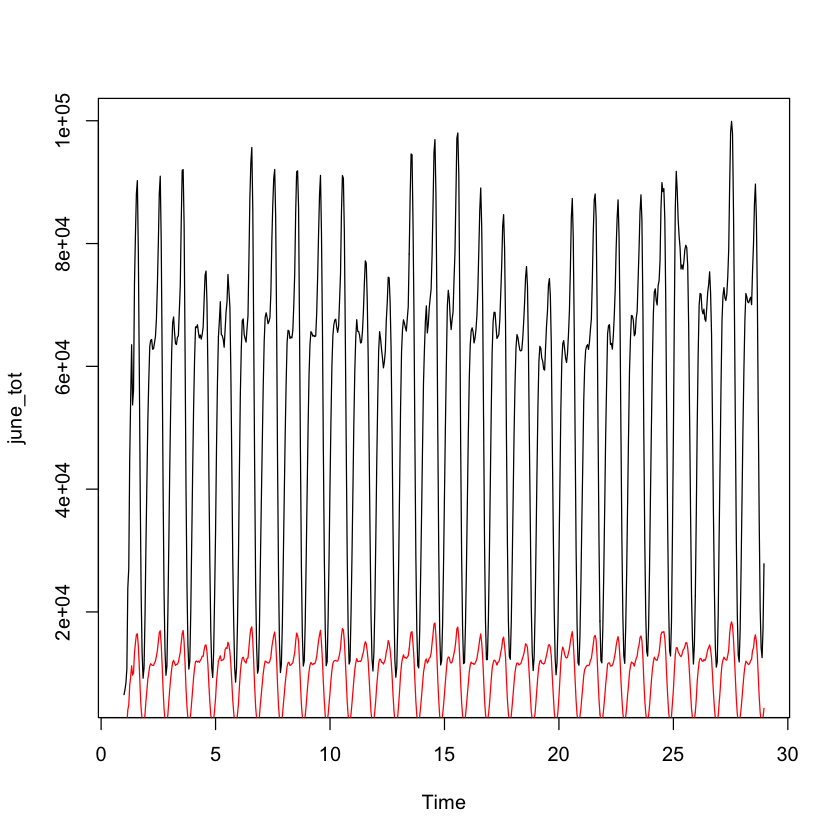

In [26]:
plot.ts(june_tot)
lines(june_alc, col='red')

In [32]:
m_conf <- matrix(c(1221/1723, 502/1723, 362/3442, 3080/3442), nrow=2, ncol=2, byrow=TRUE)

In [8]:
rowSums(m_conf)

[1] 1 1

In [30]:
m_conf

0.1051714,0.8948286
0.7086477,0.2913523


In [17]:
v_predictions <- cbind(as.vector(june_notalc), as.vector(june_alc))

In [44]:
v_predictions

5585,941
6185,1138
7100,1300
8888,1821
19853,4057
22286,4849
36980,8091
45391,9445
52276,11232
44015,9704
46082,10091


In [41]:
solve(m_conf)

1.482790,-0.482790
-0.174276,1.174276


In [45]:
true_ts <- solve(m_conf)%*% t(v_predictions)

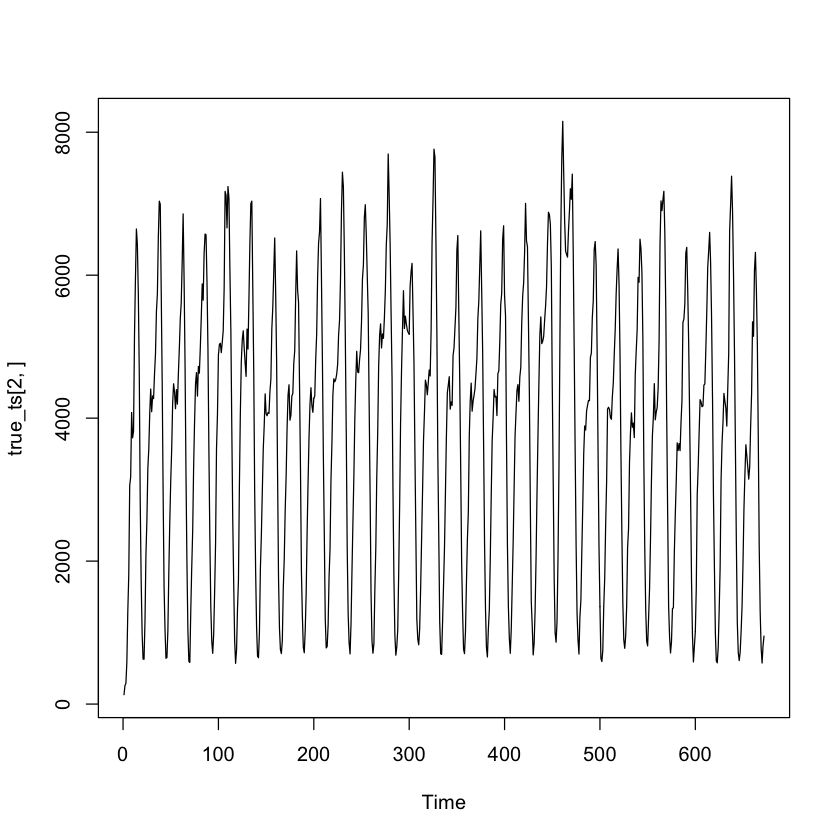

In [49]:
plot.ts(true_ts[2,])

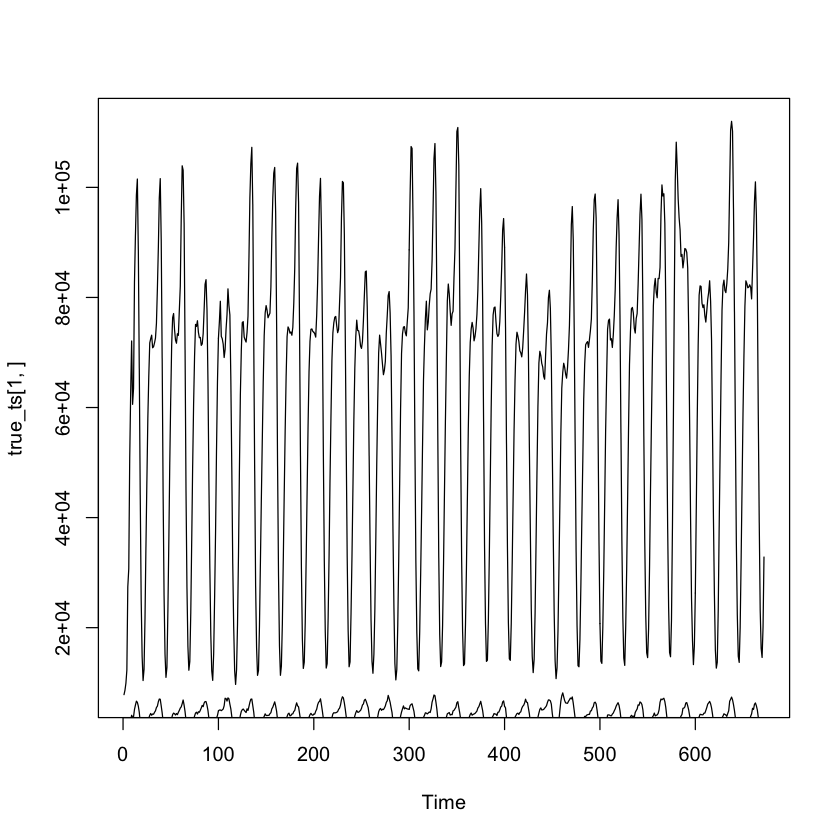

In [48]:
plot.ts(true_ts[1, ])
lines(true_ts[2, ])

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet
